In [27]:
from matplotlib import pyplot as plt
from datetime import datetime
import pandas as pd
import glob

g = glob.glob("5MinIntervals/*.txt")

data = []

for i in g:
    df = pd.read_csv(i,
                    dtype={'station': 'str', 'lon': 'float64', 'lat': 'float64', 'tmpf': 'float64', 'dwpf': 'float64', 'relh': 'float64', 'drct': 'float64', 'sknt': 'float64', 'p01i': 'float64', 'alti': 'float64', 'mslp': 'float64', 'vsby': 'float64', 'gust': 'float64', 'skyc1': 'str', 'skyc2': 'str', 'skyc3': 'str', 'skyc4': 'float64', 'skyl1': 'float64', 'skyl2': 'float64', 'skyl3': 'float64', 'skyl4': 'float64', 'wxcodes': 'str', 'metar': 'str'},
                    header=0, 
                    delimiter=",", 
                    skiprows=5, 
                    na_values="M", 
                    parse_dates=['valid'],)
    
    df.columns = df.columns.str.replace('\s+', '')
    df.set_index(df['valid'].dt.date, inplace=True)
    d = df.groupby(df.index).mean()
    
    if (len(df) >= 1096):
        data.append(d)

19S.txt
1F0.txt
1K1.txt
3AU.txt
3K3.txt
4O4.txt
AAO.txt
ADH.txt
ADM.txt


C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


AFK.txt
AHQ.txt
AIA.txt
ANW.txt
AQR.txt
AUH.txt
AVK.txt
AXS.txt
BBW.txt
BEC.txt
BFF.txt
BIE.txt
BKN.txt
BTA.txt
BVN.txt
BVO.txt
CBK.txt
CDR.txt
CFV.txt
CHK.txt
CLK.txt
CNK.txt
CNU.txt
CQB.txt
CSM.txt
CUH.txt
DDC.txt
DUA.txt
DUC.txt
EAR.txt
EHA.txt


C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (14,15,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ELK.txt
EMP.txt
END.txt
EQA.txt
EWK.txt
FDR.txt
FET.txt
FNB.txt
FOE.txt
FRI.txt
FSI.txt
GAG.txt
GBD.txt
GCK.txt
GCM.txt
GLD.txt
GMJ.txt
GOK.txt
GRI.txt
GRN.txt
GUY.txt
GZL.txt
HBR.txt
HDE.txt
HHW.txt
HJH.txt
HLC.txt
HQG.txt
HSI.txt


C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


HUT.txt


C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (15,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


HYS.txt
IAB.txt
IBM.txt
ICT.txt
IDP.txt
IML.txt
IXD.txt
JHN.txt
JSV.txt
JWG.txt
JYR.txt
K88.txt
LAW.txt
LBF.txt
LBL.txt
LCG.txt
LNK.txt
LTS.txt
LWC.txt
LXN.txt
MCK.txt
MHK.txt
MKO.txt
MLC.txt
MLE.txt
MYZ.txt
ODX.txt
OFF.txt
OFK.txt
OGA.txt
OJA.txt
OJC.txt
OKC.txt
OKM.txt
OLU.txt
OMA.txt
ONL.txt
OUN.txt
OWI.txt
OWP.txt
P28.txt
PMV.txt
PNC.txt
PPF.txt
PTS.txt
PTT.txt
PVJ.txt
PWA.txt
RCE.txt
RKR.txt
RQO.txt
RSL.txt
RVS.txt
SLN.txt
SNL.txt
SNY.txt
SWO.txt
SYF.txt
TIF.txt
TIK.txt
TOP.txt
TQE.txt
TQH.txt
TUL.txt
VTN.txt
WDG.txt
WLD.txt
WWR.txt


In [28]:
# final = pd.concat(data)
# final.to_csv('aggregated_data_filtered.csv')

['alti' 'drct' 'dwpf' 'gust' 'lat' 'lon' 'mslp' 'p01i' 'relh' 'sknt'
 'skyc1' 'skyc2' 'skyc3' 'skyc4' 'skyl1' 'skyl2' 'skyl3' 'skyl4' 'tmpf'
 'vsby' 'wxcodes']


In [ ]:
final = pd.DataFrame.from_csv("aggregated_data_filtered.csv")

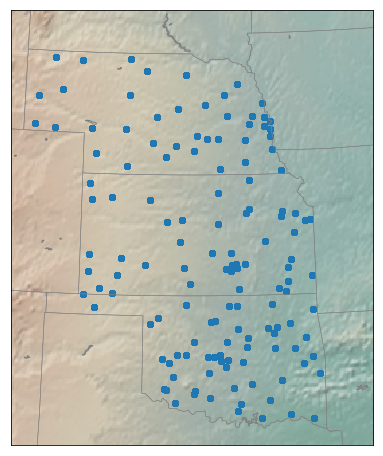

In [32]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap

lat = final['lat'].values
lon = final['lon'].values

# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=38.687745, lon_0=-98.491592,
            width=1000000, height=1200000)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True, alpha=0.5)

The daily data is more consistent that aggregating the 5 minute interval data

In [101]:
gl = glob.glob("Daily/*.txt")
counter = 0
total = 0

data_daily = []

for i in gl:
    d_test = pd.read_csv(i, parse_dates=["day"], na_values=["None"])
    if (len(d_test) >= 4748):
        data_daily.append(d_test)

final = pd.concat(data_daily)

In [102]:
from urllib.request import urlopen
import json

states = """KS NE OK"""
networks = []
for state in states.split():
    networks.append("%s_ASOS" % (state,))

master = []
    
for network in networks:
    # Get metadata
    uri = ("https://mesonet.agron.iastate.edu/"
           "geojson/network/%s.geojson") % (network,)
    
    data = urlopen(uri)
    jdict = json.load(data)
    
    master += jdict['features']

site_info = [(i['geometry']['coordinates'][1], i['geometry']['coordinates'][0]) for i in master if i['id'] in final['station'].unique()]

sites = pd.DataFrame(site_info, columns=["lat", "long"])

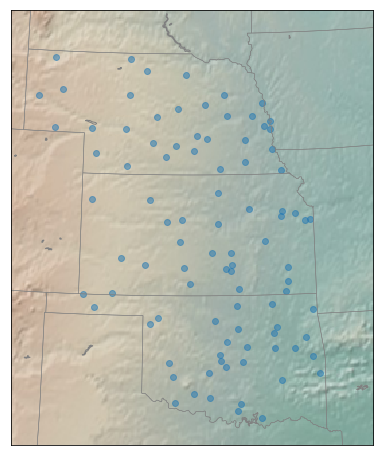

In [103]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap

lat = sites['lat'].values
lon = sites['long'].values

# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=38.687745, lon_0=-98.491592,
            width=1000000, height=1200000)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True, alpha=0.5)

station - Common identifier for the station.

day - Calendar date of the summary.

max_temp_f - Maximum Air Temperature [F].

min_temp_f - Minimum Air Temperature [F].

max_dewpoint_f - Maximum Dew Point [F].

min_dewpoint_f - Minimum Dew Point [F].

precip_in - Daily Precipitation [inch].

avg_wind_speed_kts - Average Wind Speed [knots]

avg_wind_drct - Average Wind Direction [deg]

min_rh - Minimum Relative Humidity [%]

avg_rh - Average Relative Humidity [%]: computed by time averaging the available reports, it is not average of the daily
max/min.

max_rh - Maximum Relative Humidity [%]

climo_high_f - NCDC 1981-2010 Daily High Temperature Climatology [F]

climo_low_f - NCDC 1981-2010 Daily Low Temperature Climatology [F]

climo_precip_in - NCDC 1981-2010 Daily Precipitation Climatology [inch]

snow_in - Reported Snowfall [inch]

snowd_in - Reported Snow Depth [inch]


In [104]:
# final.to_csv('aggregated_data_daily.csv')
final.isnull().sum()

station                    0
day                        0
max_temp_f              2449
min_temp_f              2445
max_dewpoint_f          2572
min_dewpoint_f          2390
precip_in              57086
avg_wind_speed_kts     11530
avg_wind_drct          11530
min_rh                 12104
avg_rh                 11547
max_rh                 11937
climo_high_f               0
climo_low_f                0
climo_precip_in            0
snow_in               205259
snowd_in              213470
dtype: int64

In [96]:
pivot = final.pivot("day", "station")

In [100]:
pivot.to_csv('pivoted_daily.csv')

In [113]:
final[final["station"] == '1F0'].to_csv("test.csv")